Paige Haring

peh40@pitt.edu

9.17.17

## PANDAS

### Intermediate Python for Data Science

#### What is Pandas?
- Pandas is a newer package built on top of NumPy for effecient implementation of a *DataFrame*
    - multidimensional arrays with attached row and column labels
    - full of different types
    - can have missing data
    - good for labeled data!
- Pandas helps with things NumPy can't do
    - working with labeled data, working with data where some is missing, etc.
    - can group and pivot data
    - *This is helpful because the data around us isn't always well structured*

#### Introducing Pandas Objects
A NumPy array whose rows and columns are given labels, not a numerical index

##### Series
- one-dimensional array of indexed data
- can be created from a list or array
- wraps both a sequence of values and a sequence of indices
    - values: a numpy array of the values you stored
    - index: array-like object pd.Index
- data can be accessed by the associated index
    

In [1]:
import numpy as np
import pandas as pd

#Create series from a list

grades = [99, 100, 85, 85, 70, 76, 40, 59, 64, 75, 75, 82, 84, 83]

grades_series = pd.Series(grades)

print("values: ", grades_series.values, type(grades_series.values))
print("indices: ", grades_series.index, type(grades_series.index))
grades_series

values:  [ 99 100  85  85  70  76  40  59  64  75  75  82  84  83] <class 'numpy.ndarray'>
indices:  RangeIndex(start=0, stop=14, step=1) <class 'pandas.core.indexes.range.RangeIndex'>


0      99
1     100
2      85
3      85
4      70
5      76
6      40
7      59
8      64
9      75
10     75
11     82
12     84
13     83
dtype: int64

Series are a lot like regular NumPy arrays, except the indices are *explicitly defined*, meaning they don't have to be integers!
- letters
- non-sequential integers

In [2]:
#Multiple choice: What is 2*2?
answers = pd.Series([2, 4, 6, 8], index=['a', 'b', 'c', 'd'])
print(answers)
answers['b']

a    2
b    4
c    6
d    8
dtype: int64


4

Series can also be looked at like Python dictionaries! However, Series keep track of type information (like an array as opposed to a Python list) making it more efficient. You can also perform some cool operations on it.

In [3]:
avgs = {'Cary': 90, 'Alex': 95, 'Stephanie': 70, 'Steven':63}
student_avgs = pd.Series(avgs) #NOTE: The dictionary is rearranged alphabetically by key
print(student_avgs, '\n')
print(student_avgs['Alex'], '\n')
print(student_avgs['Alex':'Stephanie']) #NOTE: This includes the value at the Stephanie index

Alex         95
Cary         90
Stephanie    70
Steven       63
dtype: int64 

95 

Alex         95
Cary         90
Stephanie    70
dtype: int64


##### pd.Series(data, index=index)
- data can be a list or NumPy array
    - index defaults to an integer sequence
- data can be a scalar to fill each spot in array with that scalar
    - must specify indices
- data can be a dict
    - index defaults to keys
- indices can always be explicitly declared


In [4]:
data1 = pd.Series([10, 20, 30, 40])
data2 = pd.Series(5, index=[1,2,3,4,5])
data3 = pd.Series({'x': 24, 'y': 25, 'z':26})
#Note: we can explicitly declare the indices and only those are kept
data4 = pd.Series({'x': 24, 'y': 25, 'z':26}, index=['x', 'z'])
data5 = pd.Series(5, index=[1,2,3,5])

print(data1, '\n')
print(data2, '\n')
print(data3, '\n')
print(data4, '\n')
print(data5, '\n')

#How can we do a scalar if we want there to be a large number of entries w/o typing each index?
data6 = pd.Series(5, index = np.linspace(0, 10, 11))
print(data6, '\n')

0    10
1    20
2    30
3    40
dtype: int64 

1    5
2    5
3    5
4    5
5    5
dtype: int64 

x    24
y    25
z    26
dtype: int64 

x    24
z    26
dtype: int64 

1    5
2    5
3    5
5    5
dtype: int64 

0.0     5
1.0     5
2.0     5
3.0     5
4.0     5
5.0     5
6.0     5
7.0     5
8.0     5
9.0     5
10.0    5
dtype: int64 



##### DataFrames
- two-dimensional array with both flexible row indices and flexible column names
- sequence of aligned Series objects
    - *aligned*- share the same index
- index attribute that gives access to the index (row) labels
- columns attribute, which is an Index object holding the column labels


In [5]:
#We will use student_avgs from before, and make anoter letter grade series right now
letter_grade = pd.Series(['A', 'A', 'C', 'D'], index=['Alex', 'Cary', 'Stephanie', 'Steven'])
grades = pd.DataFrame({'Grade': letter_grade, 'Average': student_avgs})
print(grades.columns)
print(grades.index)
grades

Index(['Average', 'Grade'], dtype='object')
Index(['Alex', 'Cary', 'Stephanie', 'Steven'], dtype='object')


,Average,Grade
Alex,95,A
Cary,90,A
Stephanie,70,C
Steven,63,D


We can think of DataFrames as dictionaries that map a column name to a Series of column data

In [6]:
print(grades['Average'], '\n')
print(grades['Grade'], '\n')

#Note: grades['Alex'] cause an error. It does not return Alex 95 A
#But I feel like maybe it should?
print(grades['Average']['Alex'])

Alex         95
Cary         90
Stephanie    70
Steven       63
Name: Average, dtype: int64 

Alex         A
Cary         A
Stephanie    C
Steven       D
Name: Grade, dtype: object 

95


##### pd.DataFrame(population, columns=[columns])
- can be constructed from a single series
- can be constructed from a list of dictionaries
    - if some keys are missing, Pandas puts in NaN- not a number
- can be constructed from a dictionary of series objects
- can be constructed from a 2D numpy array

In [7]:
letter_grades_df = pd.DataFrame(letter_grade, columns = ['Grade'])
print(letter_grades_df)
ages = pd.DataFrame([{'Sister':18, 'Mom':50, 'Dad':51}], index=['Age'])
print(ages)


          Grade
Alex          A
Cary          A
Stephanie     C
Steven        D
     Dad  Mom  Sister
Age   51   50      18


##### Indexes
- immutable array or ordered set

In [8]:
#As an ordered set
indA = pd.Index([10, 20, 30, 40, 50])
indB = pd.Index([5, 10, 15, 'a', 'b'])

print(indA&indB)
print(indA|indB)

Index([10], dtype='object')
Index([10, 20, 30, 40, 50, 5, 15, 'a', 'b'], dtype='object')


#### Some Cool Indexing

In [9]:
'Alex' in student_avgs

True

In [10]:
student_avgs['Alex']

95

In [11]:
list(student_avgs.items())

[('Alex', 95), ('Cary', 90), ('Stephanie', 70), ('Steven', 63)]

In [12]:
student_avgs['Stephanie'] = 97
student_avgs

Alex         95
Cary         90
Stephanie    97
Steven       63
dtype: int64

In [13]:
student_avgs['Alex':'Stephanie']

Alex         95
Cary         90
Stephanie    97
dtype: int64

In [14]:
student_avgs[0:3]

Alex         95
Cary         90
Stephanie    97
dtype: int64

In [15]:
student_avgs[(student_avgs>60) & (student_avgs<90)] #NEED those parenthesis

Steven    63
dtype: int64

In [16]:
#Uses explicit index for indexing, implicit for slicing
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [17]:
data[1]

'a'

In [18]:
data[1:3]

3    b
5    c
dtype: object

In [19]:
data[3:5] #Empty because we dont have those implicit indices

Series([], dtype: object)

In [20]:
# .loc means you ALWAYS use the explicit index for indexing AND slicing
data.loc[1]

'a'

In [21]:
data.loc[1:3]

1    a
3    b
dtype: object

In [22]:
data.loc[3:5] #NOTE: .loc INCLUDES the second part of the slice!

3    b
5    c
dtype: object

In [23]:
# .iloc uses the implicit
data.iloc[1]

'b'

In [24]:
#From above when I tried to index just the row of 'Alex' and couldn't
grades.loc['Alex']

Average    95
Grade       A
Name: Alex, dtype: object

**One guiding principle of Python code is that "explicit is better than implicit."**

**Indexing refers to columns, slicing refers to rows**

In [25]:
grades.T #transpose the DataFrame!

,Alex,Cary,Stephanie,Steven
Average,95,90,70,63
Grade,A,A,C,D


### Intermediate Python for Data Science

In [26]:
eat = pd.read_csv('placestoeat_haring.csv', index_col='Place')
print(eat)

                         Neighborhood Price
Place                                      
Girasole                    Shadyside    $$
Smallman Galley             The Strip    $$
Pastolis                Squirrel Hill     $
Gaucho                      The Strip    $$
Spice Island Tea House  South Oakland     $
Fatheads                   South Side     $
Pamela's                      Oakland     $
Noodlehead               East Liberty     $
SMOKE                   Lawrenceville    $$
The Yard                    Shadyside    $$
All India               North Oakland     $
The Columbian Spot         South Side     $
Chicken Latino              The Strip     $
Bangkok Balcony         Squirrel Hill    $$
Emporio                      Downtown    $$


In [27]:
print(eat['Price']['Bangkok Balcony'])

$$


In [28]:
print(eat.Neighborhood['Girasole'])

Shadyside


In [29]:
print(eat[eat.Neighborhood == 'The Strip'])

                Neighborhood Price
Place                             
Smallman Galley    The Strip    $$
Gaucho             The Strip    $$
Chicken Latino     The Strip     $


In [30]:
eat.loc['All India', 'Neighborhood']

'North Oakland'

In [31]:
eat.iloc[10,0]

'North Oakland'

In [32]:
print(eat[['Price','Neighborhood']]) #Reorders columns

                       Price   Neighborhood
Place                                      
Girasole                  $$      Shadyside
Smallman Galley           $$      The Strip
Pastolis                   $  Squirrel Hill
Gaucho                    $$      The Strip
Spice Island Tea House     $  South Oakland
Fatheads                   $     South Side
Pamela's                   $        Oakland
Noodlehead                 $   East Liberty
SMOKE                     $$  Lawrenceville
The Yard                  $$      Shadyside
All India                  $  North Oakland
The Columbian Spot         $     South Side
Chicken Latino             $      The Strip
Bangkok Balcony           $$  Squirrel Hill
Emporio                   $$       Downtown


In [33]:
print(eat['Fatheads':'The Yard'])

             Neighborhood Price
Place                          
Fatheads       South Side     $
Pamela's          Oakland     $
Noodlehead   East Liberty     $
SMOKE       Lawrenceville    $$
The Yard        Shadyside    $$


In [34]:
print(eat['The Yard':'Fatheads':-1]) #Reverse it!

             Neighborhood Price
Place                          
The Yard        Shadyside    $$
SMOKE       Lawrenceville    $$
Noodlehead   East Liberty     $
Pamela's          Oakland     $
Fatheads       South Side     $


# To Do 4

In [35]:
 baby_names = pd.read_csv('Most_Popular_Baby_Names_by_Sex_and_Mother_s_Ethnic_Group__New_York_City.csv')

In [36]:
baby_names.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,ISABELLA,331,1
1,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
2,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
3,2011,MALE,BLACK NON HISPANIC,JAYDEN,184,1
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1


In [37]:
baby_names.tail()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
2884,2014,MALE,BLACK NON HISPANIC,Tristan,52,25
2885,2014,MALE,HISPANIC,Joseph,114,25
2886,2014,FEMALE,WHITE NON HISPANIC,Grace,86,25
2887,2014,MALE,ASIAN AND PACIFIC ISLANDER,Vincent,46,25
2888,2014,MALE,WHITE NON HISPANIC,Isaac,125,25


In [38]:
len(baby_names[baby_names.Gender == "MALE"].index) #How many male names are there?

1276

In [39]:
baby_names.loc[0]

Year of Birth             2011
Gender                  FEMALE
Ethnicity             HISPANIC
Child's First Name    ISABELLA
Count                      331
Rank                         1
Name: 0, dtype: object

In [40]:
baby_names.loc[12]

Year of Birth             2011
Gender                  FEMALE
Ethnicity             HISPANIC
Child's First Name    ISABELLA
Count                      331
Rank                         1
Name: 12, dtype: object

In [41]:
baby_names.loc[0] == baby_names.loc[12]

Year of Birth         True
Gender                True
Ethnicity             True
Child's First Name    True
Count                 True
Rank                  True
dtype: bool

In [42]:
mini = baby_names[:20]
mini #type is DataFrame


,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,ISABELLA,331,1
1,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
2,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
3,2011,MALE,BLACK NON HISPANIC,JAYDEN,184,1
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
5,2011,FEMALE,BLACK NON HISPANIC,MADISON,176,1
6,2011,MALE,HISPANIC,JAYDEN,426,1
7,2011,MALE,WHITE NON HISPANIC,MICHAEL,292,1
8,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
9,2011,MALE,BLACK NON HISPANIC,JAYDEN,184,1


In [43]:
#What happens with a for loop?
for entry in mini:
    print(entry, type(entry))

Year of Birth <class 'str'>
Gender <class 'str'>
Ethnicity <class 'str'>
Child's First Name <class 'str'>
Count <class 'str'>
Rank <class 'str'>


In [44]:
#How to remove repeat entries?
#http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.drop_duplicates.html
baby_names = baby_names.drop_duplicates()
mini.drop_duplicates()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,ISABELLA,331,1
1,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
2,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
3,2011,MALE,BLACK NON HISPANIC,JAYDEN,184,1
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
5,2011,FEMALE,BLACK NON HISPANIC,MADISON,176,1
6,2011,MALE,HISPANIC,JAYDEN,426,1
7,2011,MALE,WHITE NON HISPANIC,MICHAEL,292,1


In [45]:
len(baby_names) #This works too!

1050

In [46]:
baby_names.head(20)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,ISABELLA,331,1
1,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
2,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
3,2011,MALE,BLACK NON HISPANIC,JAYDEN,184,1
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
5,2011,FEMALE,BLACK NON HISPANIC,MADISON,176,1
6,2011,MALE,HISPANIC,JAYDEN,426,1
7,2011,MALE,WHITE NON HISPANIC,MICHAEL,292,1
32,2012,FEMALE,ASIAN AND PACI,CHLOE,172,1
33,2012,FEMALE,BLACK NON HISP,MADISON,159,1


In [47]:
#How big is it now?
baby_names.tail()
#index 2829 vs 2888, but len told me there were 1050- What does this mean?

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
2825,2014,MALE,ASIAN AND PACIFIC ISLANDER,Vincent,46,25
2826,2014,MALE,BLACK NON HISPANIC,Matthew,52,25
2827,2014,MALE,BLACK NON HISPANIC,Tristan,52,25
2828,2014,MALE,HISPANIC,Joseph,114,25
2829,2014,MALE,WHITE NON HISPANIC,Isaac,125,25


In [48]:
(baby_names.Count > 400)[:10]
#Notice! To answer my question above- it seems like when I removed duplicates, the indicies didn't shift.
#Look at how we go from 0, 1, 2, 3, 4, 5, 6, 7, 32, 33

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
32    False
33    False
Name: Count, dtype: bool

In [49]:
#Saw this in Andrew's Todo 4 and thought it was cool

#user = input("Enter ZIP code to find city: ")
#loc = zips.loc[zips.ZIP == int(user)]
#if loc.empty:
#    print("Not a valid ZIP code")
#else:
#    for item in loc["City"]:
#        print(item)

#year = input("Enter a year for the number one baby names!")

#loc = baby_names.loc[baby_names.Year == year]

#I wanted to do this, but the name of the column has a space in it so I don't know how to call it...



# To Do 5- Wrapping it all up

In [84]:
#Solution to previous question

year = int(input("Enter a year for the number one baby names: "))
while year not in baby_names['Year of Birth'].values:
   year = int(input("We don't have data for that year. Try another one: "))

good_year = baby_names.loc[(baby_names['Year of Birth'] == year) & (baby_names['Rank'] == 1)] #DataFrame
good_year

Enter a year for the number one baby names: 1996
We don't have data for that year. Try another one: 2018
We don't have data for that year. Try another one: 2012


,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
32,2012,FEMALE,ASIAN AND PACI,CHLOE,172,1
33,2012,FEMALE,BLACK NON HISP,MADISON,159,1
34,2012,FEMALE,HISPANIC,ISABELLA,327,1
35,2012,FEMALE,WHITE NON HISP,EMMA,228,1
36,2012,MALE,ASIAN AND PACI,RYAN,197,1
37,2012,MALE,BLACK NON HISP,JAYDEN,171,1
38,2012,MALE,HISPANIC,JAYDEN,364,1
39,2012,MALE,WHITE NON HISP,JOSEPH,300,1


In [140]:
#0s and NaNs!

clothes_owned_dict= {"Shirts":[5, 6, 8, 20, 5, 7, 10, 15, 16, 20, 17],
                     "Pants" :[0, 5, 7, 4, 6, 8, 6, 3, None, 7, 10],
                     "Skirts":[7, 0, 0, 0, 0, 2, 2, 3, 2, 1, 5]}

clothes_owned = pd.DataFrame(clothes_owned_dict)
clothes_owned.index = ['Cary', 'Dan', 'Alex', 'Adam', 'Jess', 'Aneesha', 'Steph', 'Hannah', 'Alee', 'Cara', 'Lynn']
clothes_owned

,Pants,Shirts,Skirts
Cary,0.0,5,7
Dan,5.0,6,0
Alex,7.0,8,0
Adam,4.0,20,0
Jess,6.0,5,0
Aneesha,8.0,7,2
Steph,6.0,10,2
Hannah,3.0,15,3
Alee,NaN,16,2
Cara,7.0,20,1


In [108]:
#Return columns with all nonzero values
clothes_owned.loc[:, clothes_owned.all()]

,Shirts
Cary,5
Dan,6
Alex,8
Adam,20
Jess,5
Aneesha,7
Steph,10
Hannah,15
Alee,16
Cara,20


In [79]:
#Return rows with all nonzero values
#clothes_owned.loc[clothes_owned.all(), :]
#CANT DO THIS

In [109]:
#Return columns with NaN
clothes_owned.loc[:, clothes_owned.isnull().any()]

,Pants
Cary,0.0
Dan,5.0
Alex,7.0
Adam,4.0
Jess,6.0
Aneesha,8.0
Steph,6.0
Hannah,3.0
Alee,NaN
Cara,7.0


In [110]:
#Return all columns withOUT NaN
clothes_owned.loc[:, clothes_owned.notnull().all()]

,Shirts,Skirts
Cary,5,7
Dan,6,0
Alex,8,0
Adam,20,0
Jess,5,0
Aneesha,7,2
Steph,10,2
Hannah,15,3
Alee,16,2
Cara,20,1


In [141]:
#Add a column
clothes_owned["Money"] = [20, 5, 23, 19, 4, 5, 8, 25, 7, 50, 16]
clothes_owned

,Pants,Shirts,Skirts,Money
Cary,0.0,5,7,20
Dan,5.0,6,0,5
Alex,7.0,8,0,23
Adam,4.0,20,0,19
Jess,6.0,5,0,4
Aneesha,8.0,7,2,5
Steph,6.0,10,2,8
Hannah,3.0,15,3,25
Alee,NaN,16,2,7
Cara,7.0,20,1,50


In [145]:
#If a person has $20, they can buy another pair of pants!
pants_money = clothes_owned.Money > 19
clothes_owned.Pants[pants_money] += 1
clothes_owned.Money[pants_money] -= 20
clothes_owned

#I don't understand these warnings...

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pants,Shirts,Skirts,Money
Cary,1.0,5,7,0
Dan,5.0,6,0,5
Alex,8.0,8,0,3
Adam,4.0,20,0,19
Jess,6.0,5,0,4
Aneesha,8.0,7,2,5
Steph,6.0,10,2,8
Hannah,4.0,15,3,5
Alee,NaN,16,2,7
Cara,9.0,20,1,10


#### Transforming DataFrames

In [150]:
bit_con = {'bits':[40, 32, 80, 24, 76, 12, 4, 8],
                   'bytes':[0, 0, 0, 0, 0, 0, 0, 0],
                   'words':[0, 0, 0, 0, 0, 0, 0, 0]}
bit_con_df = pd.DataFrame(bit_con)
bit_con_df

,bits,bytes,words
0,40,0,0
1,32,0,0
2,80,0,0
3,24,0,0
4,76,0,0
5,12,0,0
6,4,0,0
7,8,0,0


In [153]:
bit_con_df.bytes = bit_con_df.bits.floordiv(8)
bit_con_df.words = bit_con_df.bytes.floordiv(4) #or
bit_con_df.words = bit_con_df.bits.floordiv(32)
bit_con_df

,bits,bytes,words
0,40,5,1
1,32,4,1
2,80,10,2
3,24,3,0
4,76,9,2
5,12,1,0
6,4,0,0
7,8,1,0


In [194]:
foods = {'food': ['apples', 'bananas', 'grapes', 'lettuce', 'oranges', 'carrots', 'strawberry'], 'seeds':['inside', 'inside', 'inside', 'inside', 'inside', 'none', 'outside']}
f_vs_v = {'lettuce': 'veggies', 'apples':'fruits', 'bananas':'fruits', 'grapes':'veggies', 'oranges':'fruits', 'carrots':'veggies', 'strawberry':'fruits'}
f_and_v = pd.DataFrame(foods)
f_and_v

,food,seeds
0,apples,inside
1,bananas,inside
2,grapes,inside
3,lettuce,inside
4,oranges,inside
5,carrots,none
6,strawberry,outside


In [195]:
f_and_v['type'] = f_and_v.food.map(f_vs_v)
f_and_v

,food,seeds,type
0,apples,inside,fruits
1,bananas,inside,fruits
2,grapes,inside,veggies
3,lettuce,inside,veggies
4,oranges,inside,fruits
5,carrots,none,veggies
6,strawberry,outside,fruits


In [196]:
f_and_v = f_and_v.set_index(['type', 'seeds'])
f_and_v = f_and_v.sort_index()
f_and_v

food
type    seeds              
fruits  inside       apples
        inside      bananas
        inside      oranges
        outside  strawberry
veggies inside       grapes
        inside      lettuce
        none        carrots

In [202]:
import matplotlib.pyplot as plt
restaurants = pd.read_csv('placestoeat_haring.csv')
#restaurants.plot(x = 'Place', y = 'Price', kind = 'bar') #Can't do this without numerical data

In [212]:
height = {'heights':[70,65,71,71], 'person':['Paige', 'Steph', 'Alex', 'Adam']}
height_df = pd.DataFrame(height)
height_df

,heights,person
0,70,Paige
1,65,Steph
2,71,Alex
3,71,Adam


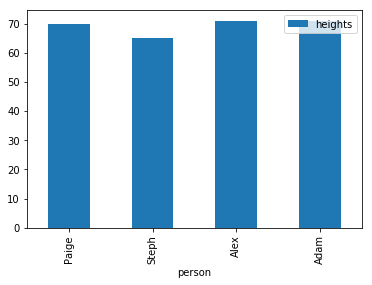

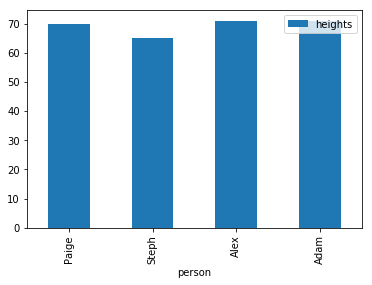

In [217]:
height_df.plot(x='person', y='heights', kind='bar')
plt.show()
#Why are there two?

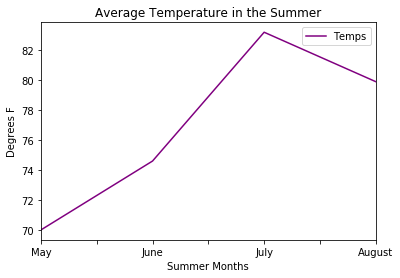

In [220]:
temps = {'Months':['May', 'June','July', 'August'], 'Temps':[70, 74.6, 83.2, 79.9]}
temps_df = pd.DataFrame(temps)
temps_df.plot(color = 'purple', x = 'Months')
plt.xlabel('Summer Months')
plt.ylabel('Degrees F')
plt.title('Average Temperature in the Summer')
plt.show()